In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


In [18]:
import cv2
img = cv2.imread('./test_images\s.jpg')
img.shape


(225, 225, 3)

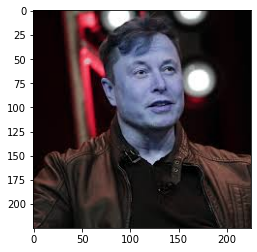

In [19]:
plt.imshow(img)

In [20]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape


(225, 225)

In [21]:
gray


array([[ 2,  2,  2, ...,  2,  2,  2],
       [ 2,  2,  2, ...,  2,  2,  2],
       [ 2,  2,  2, ...,  2,  2,  2],
       ...,
       [65, 56, 53, ..., 23, 19, 18],
       [44, 40, 47, ..., 23, 22, 18],
       [32, 52, 50, ..., 18, 23, 21]], dtype=uint8)

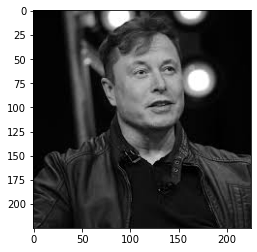

In [22]:
plt.imshow(gray, cmap='gray')

In [23]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[87, 30, 81, 81]], dtype=int32)

In [24]:
(x,y,w,h) = faces[0]
x,y,w,h

(87, 30, 81, 81)

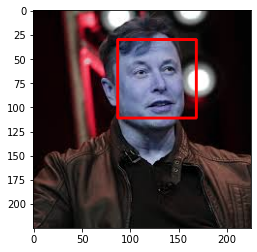

In [25]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

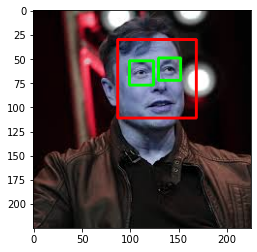

In [26]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

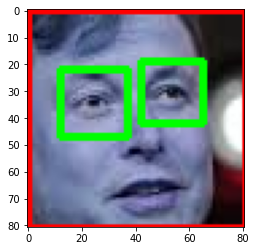

In [27]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [28]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

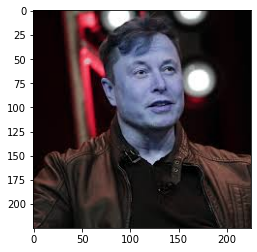

In [29]:
original_image = cv2.imread('./test_images/s.jpg')
plt.imshow(original_image)

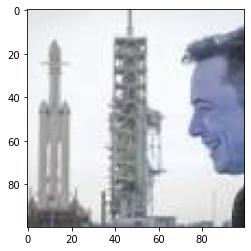

In [30]:
org_image_obstructed = cv2.imread('./test_images/s1.jpg')
plt.imshow(org_image_obstructed)

In [31]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/s1.jpg')
cropped_image_no_2_eyes

In [38]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [39]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [40]:
img_dirs

['./dataset/cropped',
 './dataset/elon',
 './dataset/jeff',
 './dataset/mark',
 './dataset/nambani',
 './dataset/sundar']

In [41]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [42]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

cropped
elon
Generating cropped images in folder:  ./dataset/cropped/elon
jeff
Generating cropped images in folder:  ./dataset/cropped/jeff
mark
Generating cropped images in folder:  ./dataset/cropped/mark
nambani
Generating cropped images in folder:  ./dataset/cropped/nambani
sundar
Generating cropped images in folder:  ./dataset/cropped/sundar
